In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [16]:
%%capture
!pip install rioxarray

In [4]:
import rioxarray

In [5]:
import os

data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.makedirs(data_folder)

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [6]:
import requests

def download(url):
  filename = os.path.join(data_folder, os.path.basename(url))
  if not os.path.exists(filename):
    with requests.get(url, stream=True, allow_redirects=True) as r:
      with open(filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
          f.write(chunk)
    print("Downloaded", filename)

In [7]:
download('https://naciscdn.org/naturalearth/10m/cultural/' +
         'ne_10m_populated_places_simple.zip')

Downloaded data/ne_10m_populated_places_simple.zip


In [8]:
file = 'ne_10m_populated_places_simple.zip'
filepath = os.path.join(data_folder, file)
places = gpd.read_file(filepath)

In [9]:
places

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,8.0,Admin-1 capital,Colonia del Sacramento,None,None,Colonia del Sacramento,0,0,...,21714,21714,0.0,7,7,None,None,9.0,1159112629,POINT (-57.83612 -34.46979)
1,10,1,8.0,Admin-1 capital,Trinidad,None,None,Trinidad,0,0,...,21093,21093,0.0,7,7,None,None,9.0,1159112647,POINT (-56.901 -33.544)
2,10,1,8.0,Admin-1 capital,Fray Bentos,None,None,Fray Bentos,0,0,...,23279,23279,0.0,7,7,None,None,9.0,1159112663,POINT (-58.304 -33.139)
3,10,1,8.0,Admin-1 capital,Canelones,None,None,Canelones,0,0,...,19698,19698,0.0,6,6,None,None,9.0,1159112679,POINT (-56.284 -34.538)
4,10,1,8.0,Admin-1 capital,Florida,None,None,Florida,0,0,...,32234,32234,0.0,7,7,None,None,7.0,1159112703,POINT (-56.215 -34.099)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7337,0,600,1.0,Admin-1 capital,Rio de Janeiro,None,None,Rio de Janeiro,0,0,...,11748000,2010175,1821489.0,14,12,Rio de Janeiro,Rio de Janeiro,1.7,1159151619,POINT (-43.21212 -22.90731)
7338,0,600,1.0,Admin-1 capital,São Paulo,None,Sao Paulo|Sio Paulo,Sao Paulo,0,0,...,18845000,10021295,11522944.0,14,14,S,Sao Paolo,3.0,1159151621,POINT (-46.62697 -23.55673)
7339,0,600,3.0,Admin-1 capital,Sydney,None,None,Sydney,0,0,...,4630000,3641422,2669348.0,12,12,Sydney,Sydney1,1.7,1159151623,POINT (151.21255 -33.87137)
7340,0,600,0.0,Admin-0 capital,Singapore,None,None,Singapore,1,0,...,5183700,3289529,3314179.0,13,12,Singapore,Singapore,2.1,1159151627,POINT (103.85387 1.29498)


In [10]:
capitals = places[places['adm0cap'] == 1]
capitals

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
880,8,10,3.0,Admin-0 capital,Vatican City,None,None,Vatican City,1,0,...,832,832,562430.0,2,2,None,Vatican City,7.0,1159127243,POINT (12.45339 41.90328)
4828,7,20,0.0,Admin-0 capital,San Marino,None,None,San Marino,1,0,...,29579,29000,0.0,7,7,None,San Marino,6.1,1159146051,POINT (12.44177 43.9361)
4833,7,20,0.0,Admin-0 capital,Vaduz,None,None,Vaduz,1,0,...,36281,5342,33009.0,7,5,None,Vaduz,6.7,1159146061,POINT (9.51667 47.13372)
5012,6,30,8.0,Admin-0 capital,Luxembourg,None,None,Luxembourg,1,0,...,107260,76684,106219.0,9,8,None,Luxembourg,6.0,1159146437,POINT (6.13 49.61166)
6178,6,30,0.0,Admin-0 capital,Palikir,None,None,Palikir,1,0,...,4645,4645,0.0,4,4,None,Palikir,6.0,1159149061,POINT (158.14997 6.91664)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7330,0,600,3.0,Admin-0 capital,Cairo,None,Al-Qahirah,Cairo,1,0,...,11893000,7734614,13720557.0,14,13,Al-Qahirah,Cairo,1.7,1159151603,POINT (31.24802 30.05191)
7332,0,600,2.0,Admin-0 capital,Tokyo,None,None,Tokyo,1,0,...,35676000,8336599,12945252.0,14,13,Tokyo,Tokyo,1.7,1159151609,POINT (139.74946 35.68696)
7334,0,600,3.0,Admin-0 capital,Paris,None,None,Paris,1,0,...,9904000,11177,7142744.0,13,6,Paris,Paris,1.7,1159151613,POINT (2.35299 48.85809)
7335,0,600,3.0,Admin-0 capital,Santiago,None,None,Santiago,1,0,...,5720000,46611,3066651.0,13,7,Santiago,Santiago3,2.0,1159151615,POINT (-70.6505 -33.44021)


In [11]:
output_file = 'capitals.gpkg'
output_path = os.path.join(output_folder, output_file)
capitals.to_file(driver='GPKG', filename=output_path)

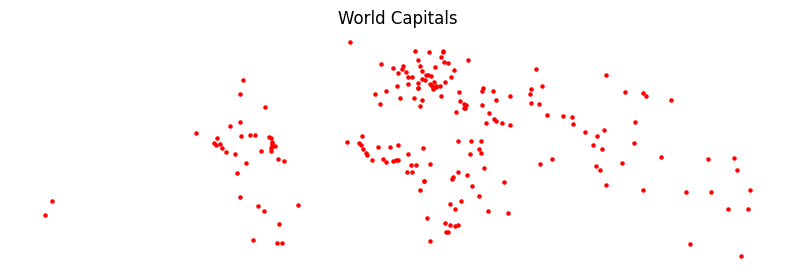

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
capitals.plot(ax=ax, color='red', markersize=5)

ax.set_title('World Capitals')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_axis_off()

# Save the plot as a PNG image
output_image_path = os.path.join(output_folder, 'world_capitals.png')
plt.savefig(output_image_path, dpi=300, bbox_inches='tight') # dpi for higher resolution
plt.show()